In [26]:
import pandas as pd

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import math

In [28]:
data = pd.read_csv('StressLevelDataset.csv')

In [29]:
data.shape

(1100, 21)

In [30]:
data.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [31]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


Pour la colonne "mental_health_history", c'est un booléen 

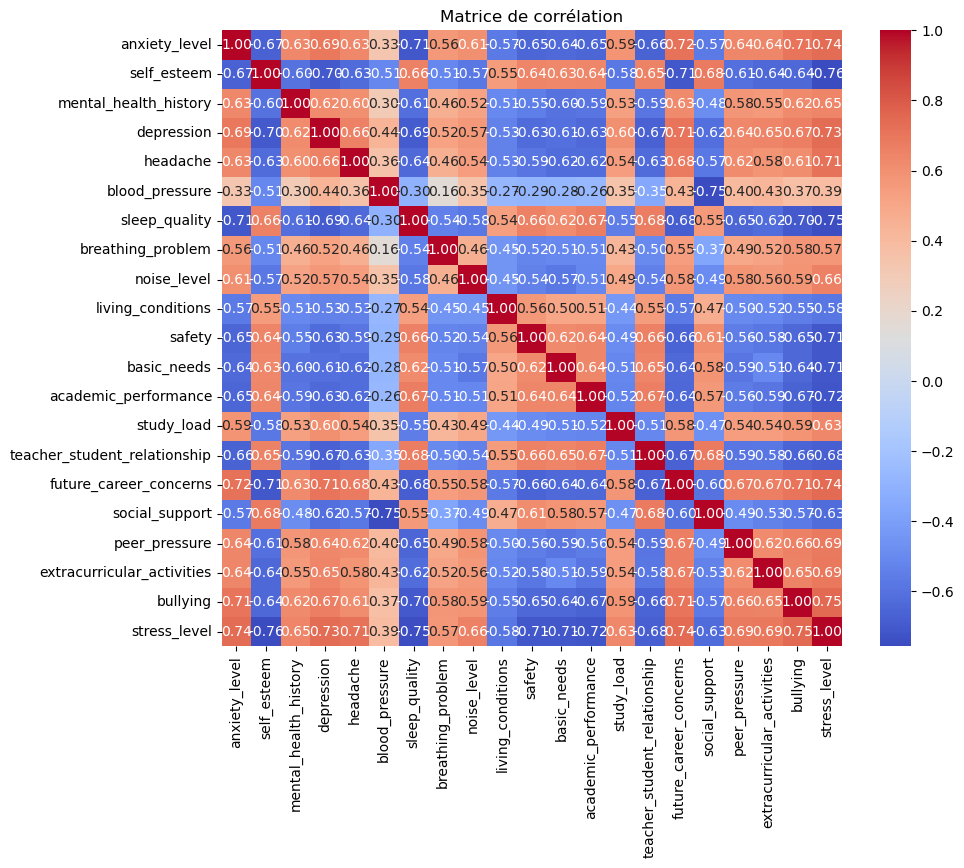

In [32]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

Affiche les corrélations entre les différentes variables. Même si on ne fait pas de classification supervisée, comprendre comment ces caractéristiques sont liées peut être utile pour interpréter les clusters

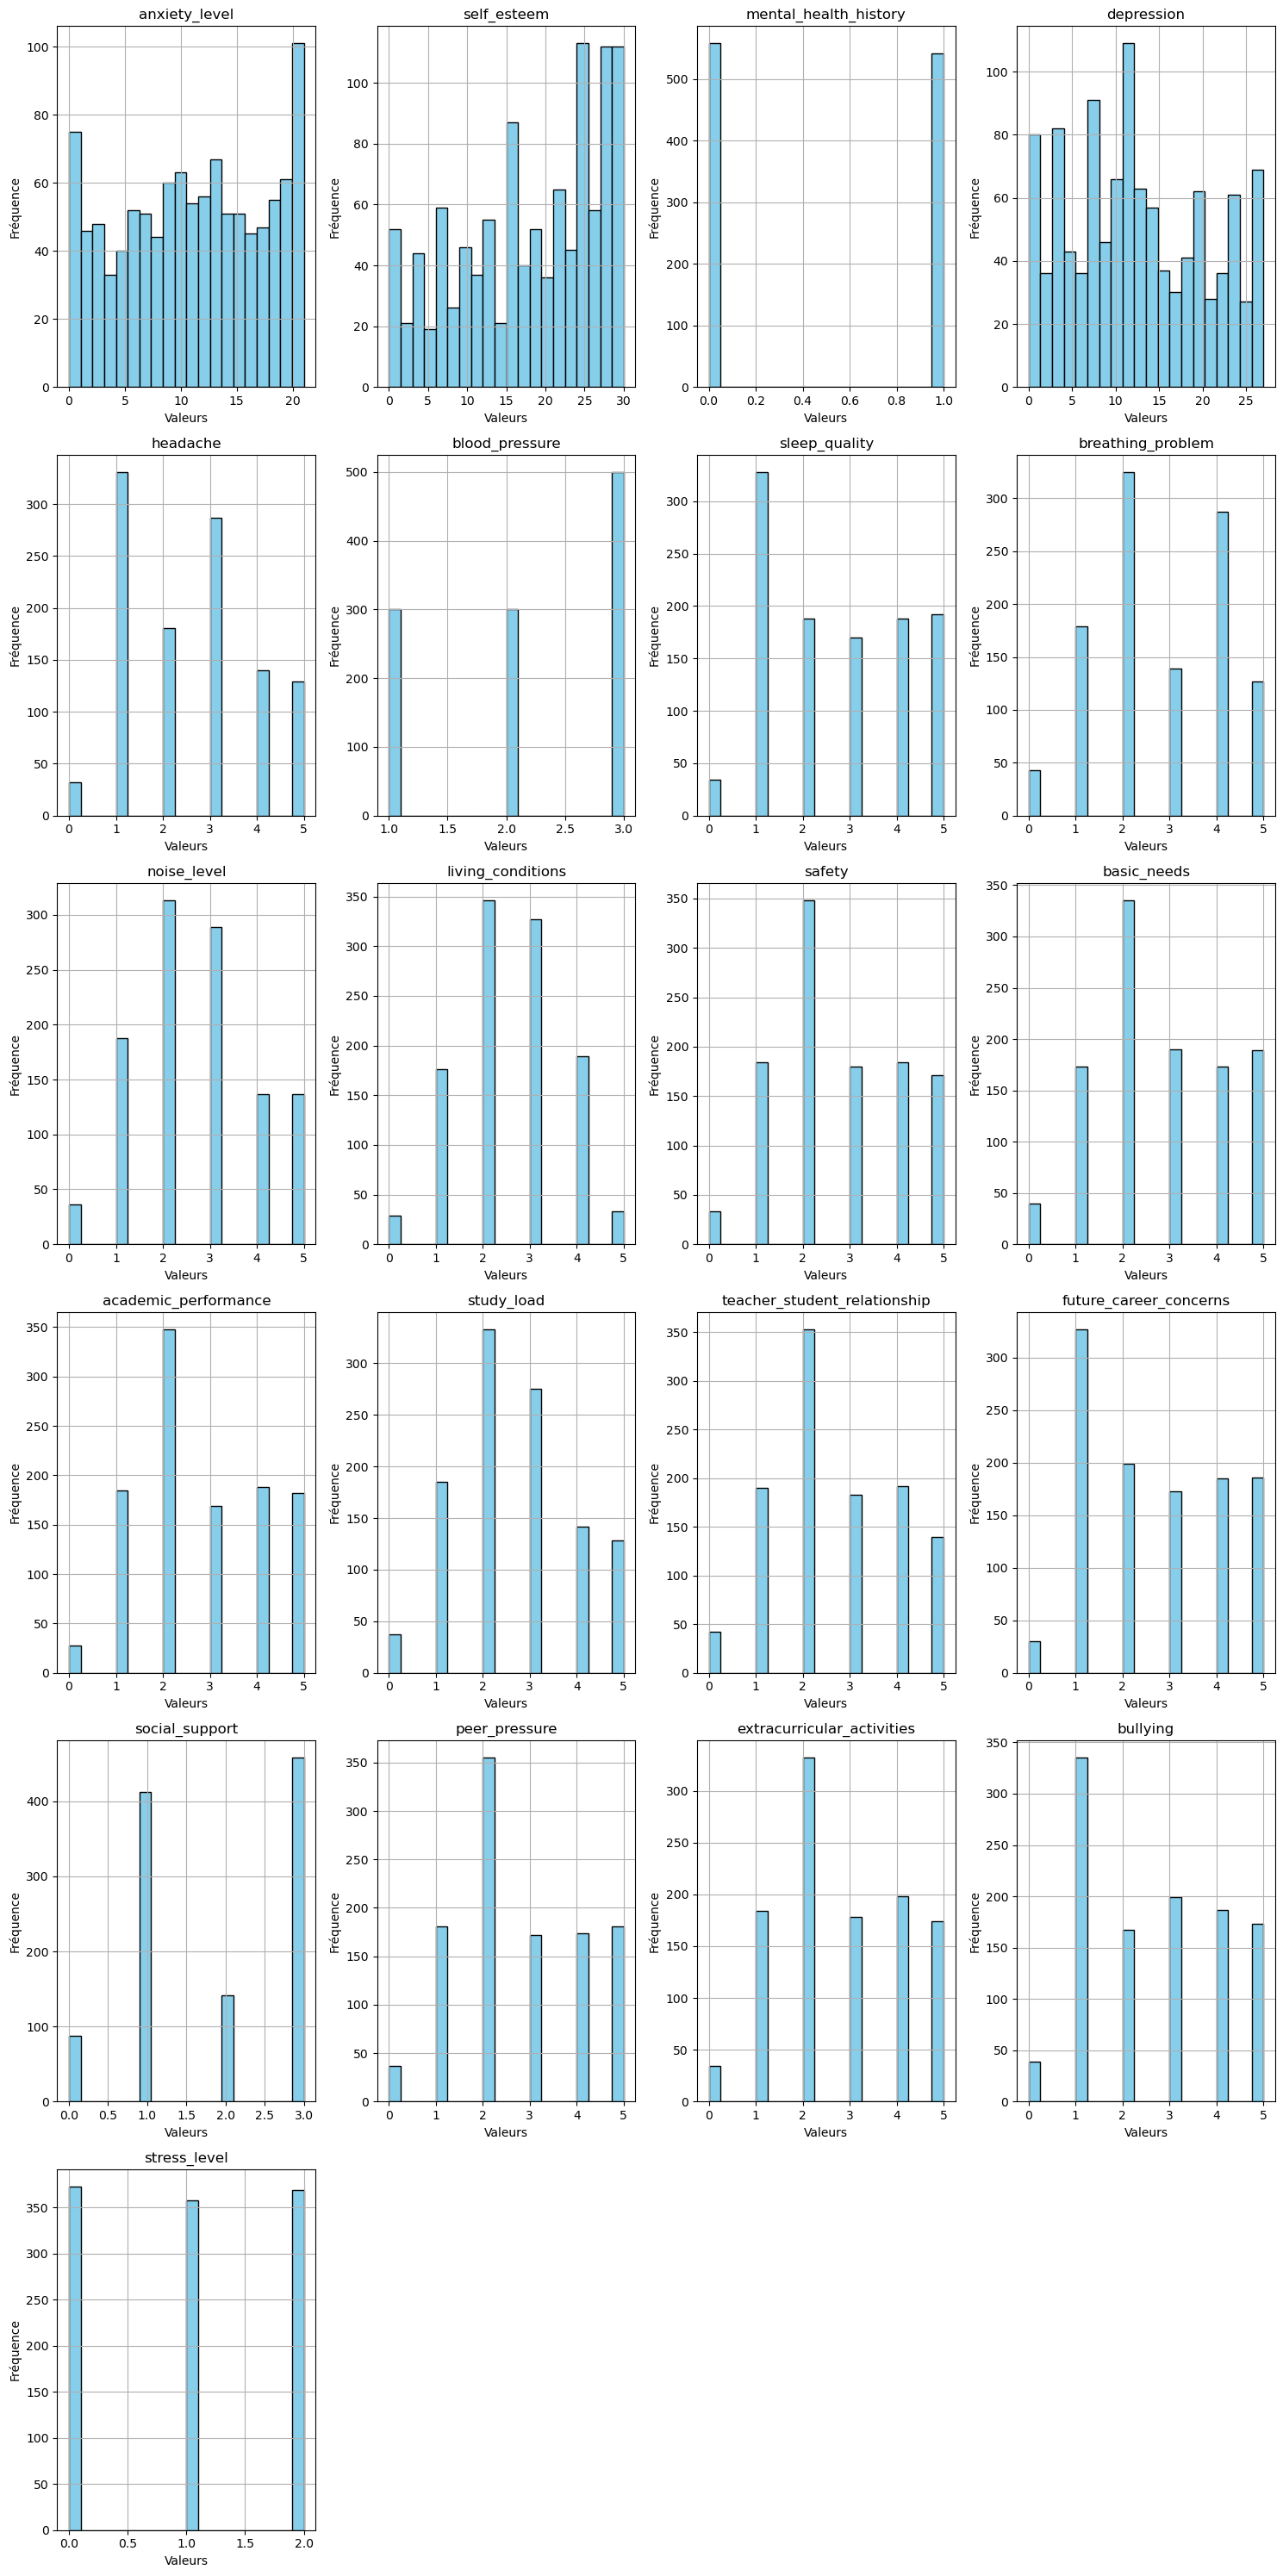

In [43]:
# Calculer le nombre de lignes et de colonnes nécessaires
num_cols = len(data.columns)
num_rows = math.ceil(num_cols / 4)  

# Définir la taille de la figure
plt.figure(figsize=(15, 5 * num_rows))

# Parcourir chaque colonne du DataFrame
for i, col in enumerate(data.columns):
    # Créer un sous-plot pour chaque colonne
    plt.subplot(num_rows, 4, i + 1)
    
    # Créer un histogramme pour la colonne actuelle
    data[col].hist(bins=20, color='skyblue', edgecolor='black')
    
    # Ajouter des étiquettes et un titre
    plt.title(col)
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


la fréquence fait référence au nombre de fois qu'une valeur particulière apparaît dans une variable donnée. Plus précisément, la fréquence représente le compte des occurrences de chaque valeur distincte dans la variable.

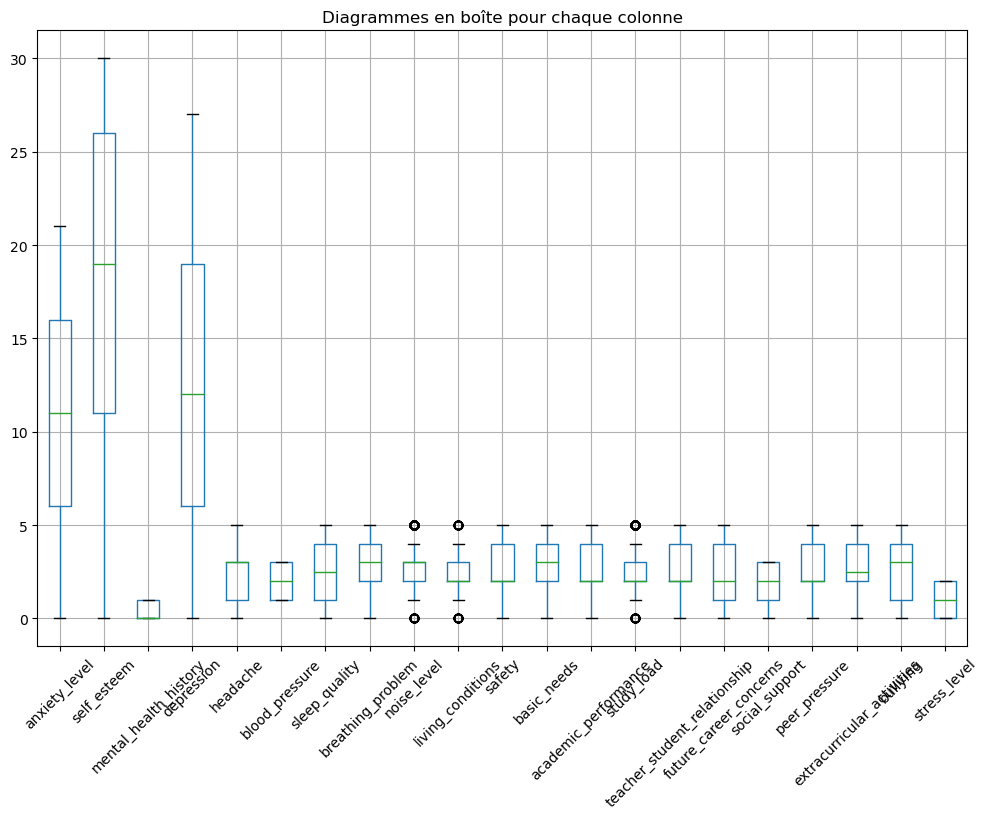

In [44]:
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title("Diagrammes en boîte pour chaque colonne")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualisez la distribution des données avec KDE pour chaque colonne
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Parcourez toutes les colonnes de votre ensemble de données
for column in data.columns:
    sns.kdeplot(data[column], label=column, fill=True)

plt.title('Distribution des Caractéristiques avec KDE')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()


Diagrammes en boîte (box plots) ou Violin plots :

    Pour chaque caractéristique, ces visualisations montrent la distribution des données et les valeurs aberrantes éventuelles. Cela peut aider à repérer des différences significatives entre les groupes une fois qu'ils sont formés.
    
Structure du diagramme en boîte :

    Médiane (ligne centrale) : La ligne à l'intérieur de la boîte représente la médiane des données.

    Boîte : La boîte elle-même représente le quartile inférieur (Q1) et le quartile supérieur (Q3) des données. La longueur de la boîte est l'écart interquartile (IQR).

    Moustaches (whiskers) : Les lignes s'étendant à partir de la boîte représentent la plage des données. Elles peuvent être définies différemment en fonction des données, par exemple, 1,5 fois l'IQR à partir des quartiles.

    Points aberrants : Les points en dehors des moustaches sont généralement considérés comme des valeurs aberrantes et sont représentés individuellement.

Interprétation :

    Centralité : La médiane donne une indication de la valeur centrale des données. Si elle est proche du centre de la boîte, la distribution est plutôt symétrique.

    Dispersion : L'écart interquartile (IQR) montre la dispersion des valeurs centrales. Plus la boîte est large, plus les données sont dispersées.

    Étendue : Les moustaches montrent l'étendue des données. Si les moustaches sont longues, cela indique que les données sont étendues.

    Valeurs aberrantes : Les points individuels en dehors des moustaches sont considérés comme des valeurs aberrantes. Ils pourraient être des points intéressants pour étudier davantage.

In [45]:
# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [46]:
scaled_data[:5]

array([[ 0.48020782,  0.24861241, -0.98555881, -0.20139257, -0.36074135,
        -1.41841629, -0.42644513,  0.89021113, -0.48894889,  0.43069508,
         0.18692374, -0.53919641,  0.16073598, -0.47279981,  0.25421325,
         0.22955038,  0.11283889,  0.18633396,  0.16424895, -0.40337716,
         0.00442758],
       [ 0.64374608, -1.09358954,  1.0146528 ,  0.31650766,  1.76885873,
         0.98198051, -1.0725741 ,  0.89021113,  0.26433372, -1.35709581,
        -0.5245507 , -0.53919641, -1.25374063,  1.04790134, -1.19092669,
         1.53786859, -0.84195172,  0.88827696,  1.57576339,  1.5570715 ,
         1.22201077],
       [ 0.15313129,  0.02491208,  1.0146528 ,  0.18703261, -0.36074135,
        -1.41841629, -0.42644513, -0.5382823 , -0.48894889, -0.46320037,
         0.18692374, -0.53919641, -0.54650233,  0.28755076,  0.25421325,
        -0.42460873,  0.11283889,  0.18633396, -0.54150826, -0.40337716,
         0.00442758],
       [ 0.80728435, -0.64618889,  1.0146528 ,  0.31650766

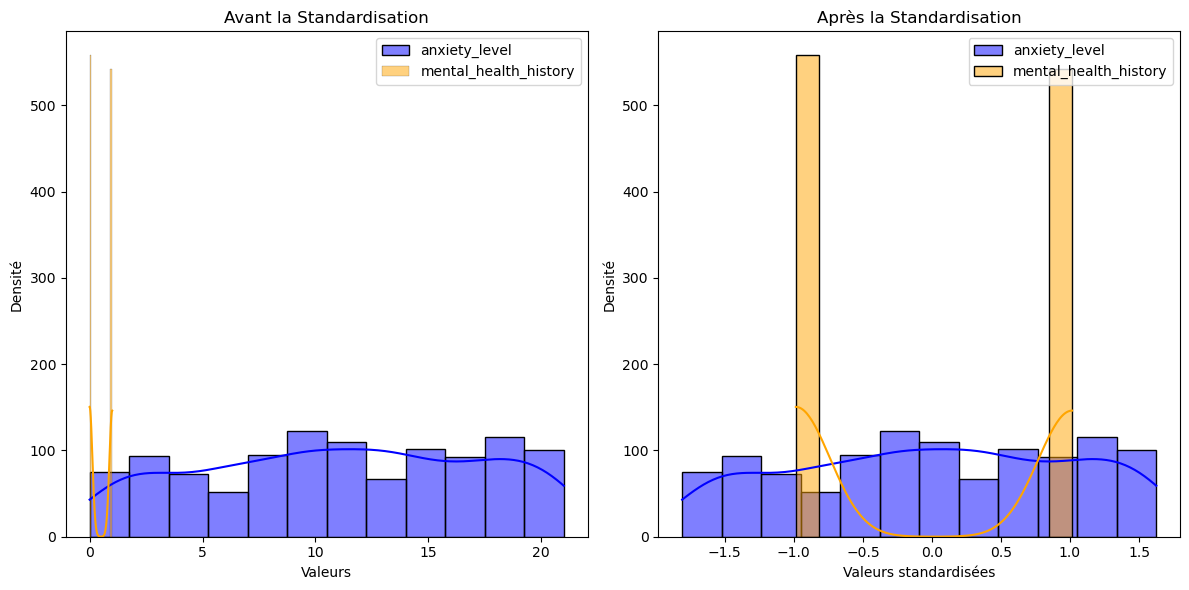

In [51]:
nom_variable_1 = 'anxiety_level'
nom_variable_2 = 'mental_health_history'
# Trouver l'indice des variables dans votre ensemble de données d'origine
indice_variable_original_1 = data.columns.get_loc(nom_variable_1)
indice_variable_original_2 = data.columns.get_loc(nom_variable_2)

# Visualisation avant et après la standardisation
plt.figure(figsize=(12, 6))

# Avant la standardisation
plt.subplot(1, 2, 1)
sns.histplot(data[nom_variable_1], kde=True, color='blue', label=nom_variable_1)
sns.histplot(data[nom_variable_2], kde=True, color='orange', label=nom_variable_2)
plt.title('Avant la Standardisation')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()

# Après la standardisation
plt.subplot(1, 2, 2)
sns.histplot(scaled_data[:, indice_variable_original_1], kde=True, color='blue', label=nom_variable_1)
sns.histplot(scaled_data[:, indice_variable_original_2], kde=True, color='orange', label=nom_variable_2)
plt.title('Après la Standardisation')
plt.xlabel('Valeurs standardisées')
plt.ylabel('Densité')
plt.legend()

plt.tight_layout()
plt.show()


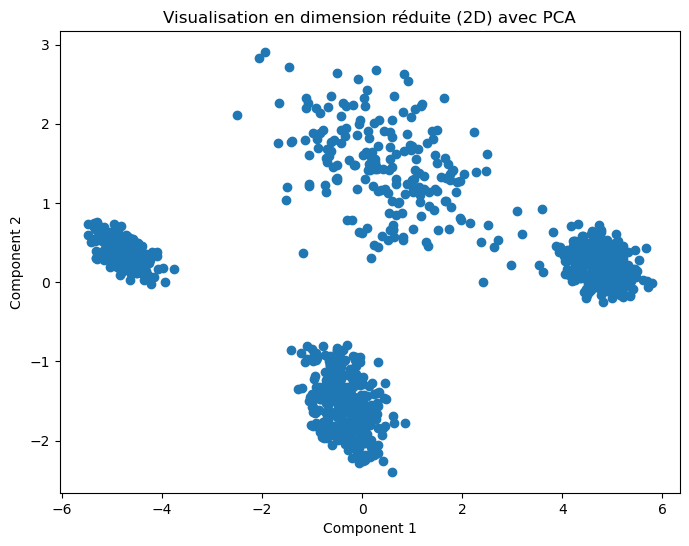

In [11]:
# Réduction de dimension avec l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Création du DataFrame pour la visualisation
pca_df = pd.DataFrame(data=pca_result, columns=['Component 1', 'Component 2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Component 1'], pca_df['Component 2'])
plt.title('Visualisation en dimension réduite (2D) avec PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Visualisation en dimension réduite :

    Si le jeu de données comporte beaucoup de variables, utiliser des techniques de réduction de dimension (comme l'ACP) pour projeter les données dans un espace à 2 ou 3 dimensions peut aider à visualiser les relations entre les points de données.

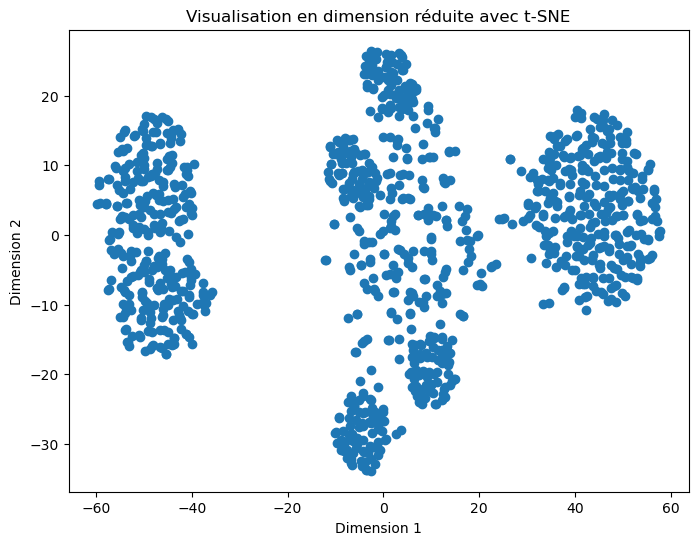

In [15]:
# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])

plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'])
plt.title('Visualisation en dimension réduite avec t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Graphiques de dispersion multidimensionnels :

    Utilise une technique comme t-SNE (t-Distributed Stochastic Neighbor Embedding) pour visualiser les similarités entre les observations dans un espace de plus basse dimension tout en préservant les structures non linéaires.

In [16]:
data.shape

(1100, 21)

In [17]:
data.dropna()
data.shape

(1100, 21)

In [19]:
data.drop_duplicates()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [20]:
data.shape

(1100, 21)

In [22]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


il est important de noter que DBSCAN n'a pas besoin de spécifier explicitement le nombre de clusters à l'avance. Cependant, pour estimer la meilleure valeur de eps (la distance maximale entre deux échantillons pour qu'ils soient considérés dans le même cluster), on peut utiliser la méthode des "k-distances" pour identifier le bon eps.
Pour trouver le bon eps:
Calcul des k-distances :

    - Pour chaque point, calcule la distance vers ses k voisins les plus proches.
    - Trie ces distances pour chaque point.

Tracé du graphique des k-distances :

    - Trace un graphique des k-distances (distance vers les k voisins les plus proches) pour chaque point, ordonné de manière décroissante.

Identification du point de coude :

     - Recherche le "coude" dans le graphique (l'endroit où la pente change brusquement). Cette position correspond à un bon candidat pour eps.

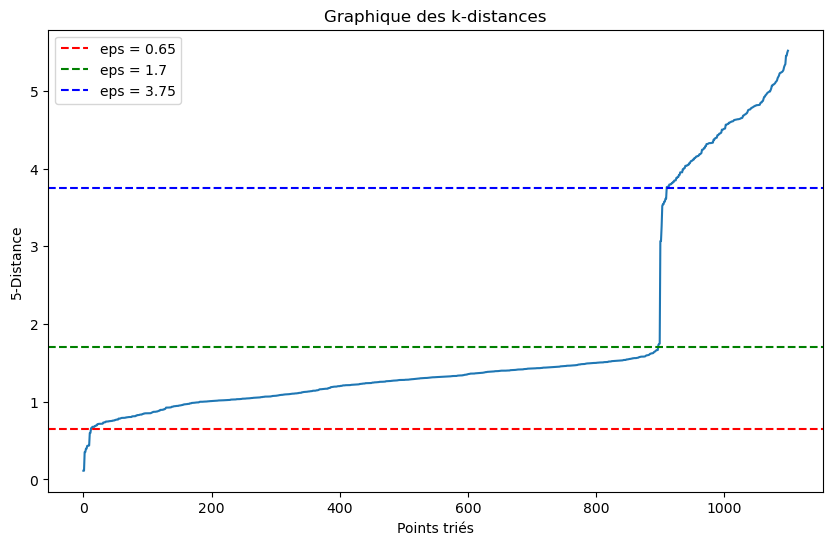

In [65]:
# Utiliser l'algorithme des k plus proches voisins pour calculer les distances
k = 5  # Choisis un nombre de voisins
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_data)
distances, _ = nbrs.kneighbors(scaled_data)

# Trier les distances des k plus proches voisins
distances = np.sort(distances, axis=0)
distances = distances[:,1]  # Prendre la distance au k plus proche voisin (exclut le point lui-même)

# Tracer le graphique des k-distances
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Graphique des k-distances')
plt.xlabel('Points triés')
plt.ylabel(f'{k}-Distance')

# Ajouter des lignes verticales pour marquer plusieurs distances potentielles
thresholds = [ 0.65 , 1.7 , 3.75]  # Liste de distances à marquer
colors = ['r', 'g', 'b']  # Couleurs pour les lignes verticales

for threshold, color in zip(thresholds, colors):
    plt.axhline(y=threshold, color=color, linestyle='--', label=f'eps = {threshold}')

plt.legend()
plt.show()

la valeur optimale de ops est 0.65, 
le point où la courbe présente une courbure significativement plus raide ou un changement brusque dans les distances est généralement considéré comme un bon candidat pour choisir eps. Cette valeur indique le niveau de densité où les points commencent à être considérés comme appartenant à différents clusters.

## appliquer le PCA avant le clustering pour réduire la dimension

Nombre de clusters : 3
Nombre de points de bruit : 2


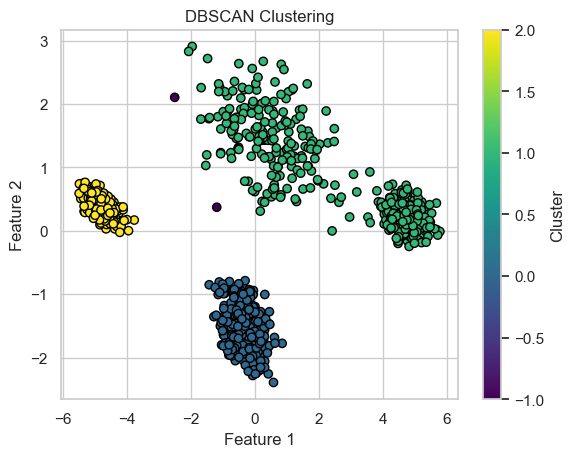

In [91]:
dbscan = DBSCAN(eps=0.65, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)
# Exemple avec ACP
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
clusters = dbscan.fit_predict(reduced_data)

# Nombre de clusters et points considérés comme du bruit (-1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise = list(clusters).count(-1)

print("Nombre de clusters :", num_clusters)
print("Nombre de points de bruit :", num_noise)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

Nombre de clusters : 4
Nombre de points de bruit : 204


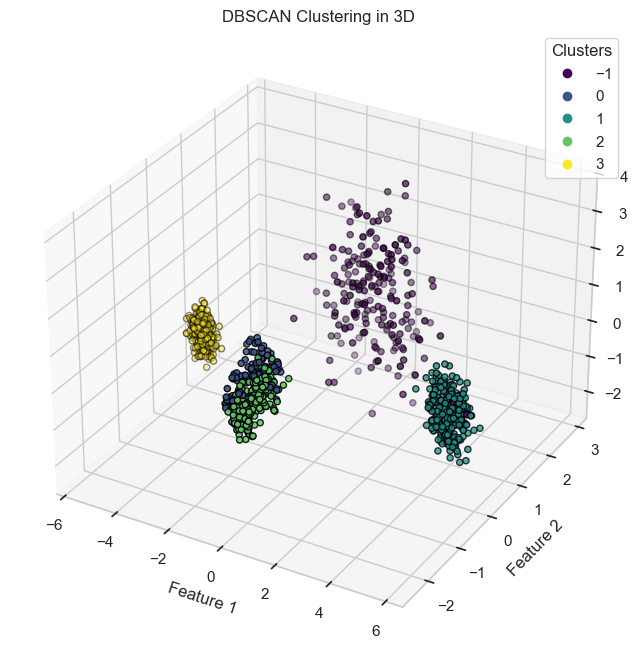

In [89]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Appliquer DBSCAN sur les données normalisées
dbscan = DBSCAN(eps=1.7, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

# Appliquer l'ACP avec 3 composantes principales
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(scaled_data)

# Nombre de clusters et points considérés comme du bruit (-1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise = list(clusters).count(-1)

print("Nombre de clusters :", num_clusters)
print("Nombre de points de bruit :", num_noise)

# Visualiser le clustering en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=clusters, cmap='viridis', marker='o', edgecolors='black')
ax.set_title('DBSCAN Clustering in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend(*scatter.legend_elements(), title='Clusters')

plt.show()


## Application du clustering sans le PCA 

Nombre de clusters : 0
Nombre de points de bruit : 1100


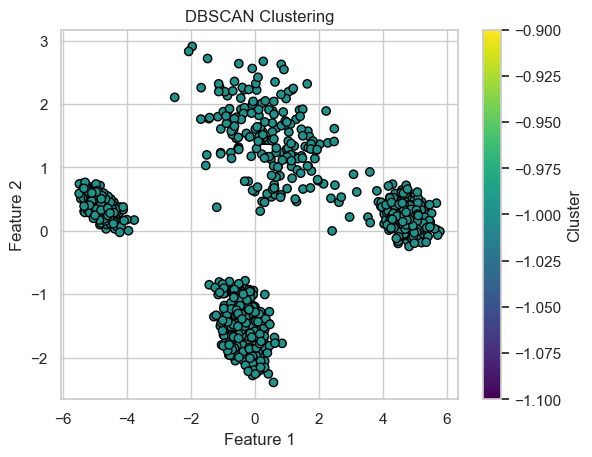

In [82]:
dbscan = DBSCAN(eps=0.65, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

# Nombre de clusters et points considérés comme du bruit (-1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise = list(clusters).count(-1)

print("Nombre de clusters :", num_clusters)
print("Nombre de points de bruit :", num_noise)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

## Application du PCA après le Clustering 

Nombre de clusters : 5
Nombre de points de bruit : 262


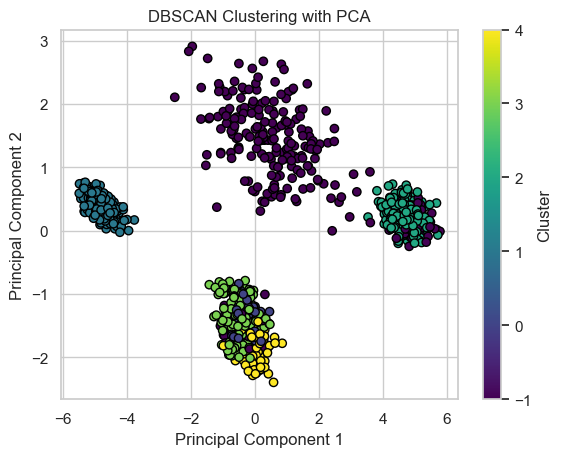

In [98]:
# Appliquer DBSCAN sur les données normalisées
dbscan = DBSCAN(eps=1.7, min_samples=10)
clusters = dbscan.fit_predict(scaled_data)

# Nombre de clusters et points considérés comme du bruit (-1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise = list(clusters).count(-1)

print("Nombre de clusters :", num_clusters)
print("Nombre de points de bruit :", num_noise)

# Appliquer l'ACP sur les données normalisées
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualisation des clusters en utilisant les composantes principales
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


## Une expérimentation dans le cas d'un eps et min_samples différents
## le PCA est appliqué avant 

Nombre de clusters : 1
Nombre de points de bruit : 0


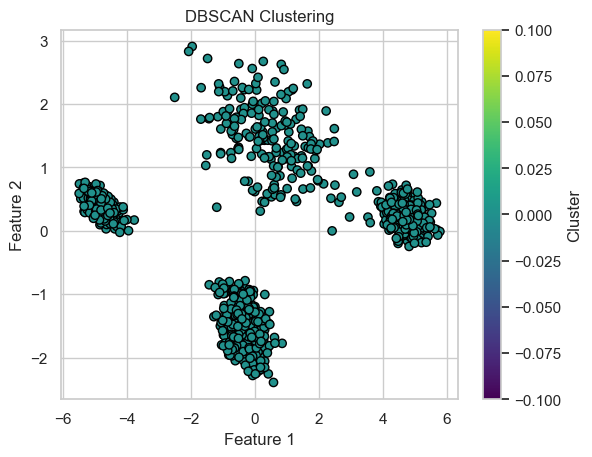

In [96]:
dbscan = DBSCAN(eps=3.75, min_samples=10)
clusters = dbscan.fit_predict(scaled_data)
# Exemple avec ACP
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
clusters = dbscan.fit_predict(reduced_data)

# Nombre de clusters et points considérés comme du bruit (-1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
num_noise = list(clusters).count(-1)

print("Nombre de clusters :", num_clusters)
print("Nombre de points de bruit :", num_noise)


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

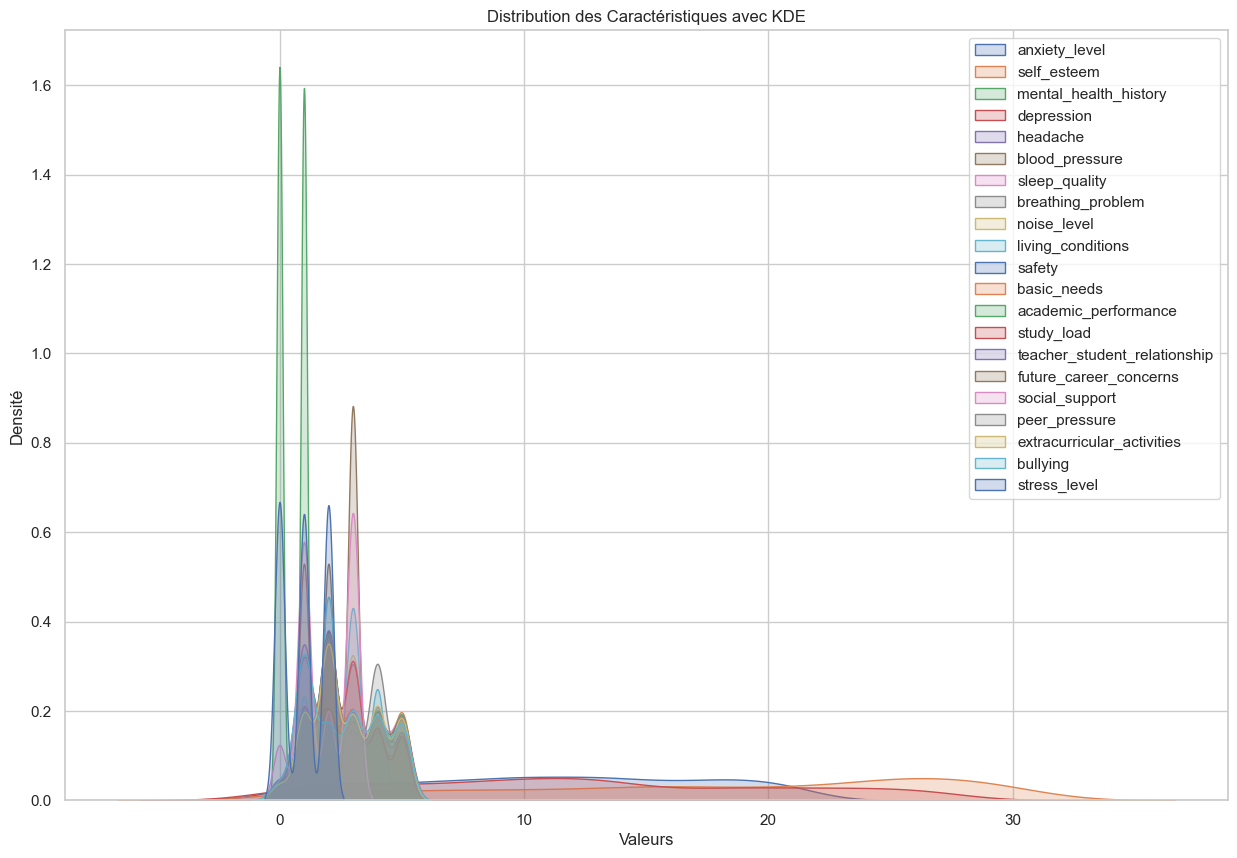

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposez que 'data' est votre ensemble de données pandas avec 21 colonnes
# Visualisez la distribution des données avec KDE pour chaque colonne
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Parcourez toutes les colonnes de votre ensemble de données
for column in data.columns:
    sns.kdeplot(data[column], label=column, fill=True)

plt.title('Distribution des Caractéristiques avec KDE')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()


les valeurs des variables qui correspondent aux pics de KDE peuvent être les candidats pour le centre des clusters. 